<a href="https://colab.research.google.com/github/HarishGarampalle/Assignment2/blob/main/ANN_Log_Reg_Titanic_Dat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the standard libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

##Load the Titanic dataset

In [74]:
data = pd.read_csv('/content/drive/MyDrive/ITC Data Science/Data Science Training/Project4-10-02-2025/TitanicPreprocessed.csv')

In [75]:
data.shape

(891, 69)

In [76]:
data.describe()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.0,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000,891.000000
mean,0.647587,29.207823,0.523008,0.381594,32.204208,0.044893,0.206510,0.580247,0.142536,0.020202,...,0.0,0.002245,0.011223,0.003367,0.741863,1.904602,0.0,0.327722,0.069585,0.383838
std,0.477990,13.557871,1.102743,0.806057,49.693429,0.207186,0.405028,0.493796,0.349796,0.140770,...,0.0,0.047351,0.105403,0.057961,0.437855,1.613459,0.0,0.469646,0.254589,0.486592
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000
50%,1.000000,26.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000
75%,1.000000,36.750000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,1.000000,2.000000,0.0,1.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,11.000000,0.0,1.000000,1.000000,1.000000


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             891 non-null    int64  
 1   Age             891 non-null    float64
 2   SibSp           891 non-null    int64  
 3   Parch           891 non-null    int64  
 4   Fare            891 non-null    float64
 5   Title_Master    891 non-null    int64  
 6   Title_Miss      891 non-null    int64  
 7   Title_Mr        891 non-null    int64  
 8   Title_Mrs       891 non-null    int64  
 9   Title_Officer   891 non-null    int64  
 10  Title_Royalty   891 non-null    int64  
 11  Embarked_C      891 non-null    int64  
 12  Embarked_Q      891 non-null    int64  
 13  Embarked_S      891 non-null    int64  
 14  Cabin_A         891 non-null    int64  
 15  Cabin_B         891 non-null    int64  
 16  Cabin_C         891 non-null    int64  
 17  Cabin_D         891 non-null    int

In [78]:
#Check for Missing values
print(data.isnull().sum())

Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
              ..
FamilySize     0
Singleton      0
SmallFamily    0
LargeFamily    0
Survived       0
Length: 69, dtype: int64


<ipython-input-79-4140c4e43488>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=data, palette="coolwarm")


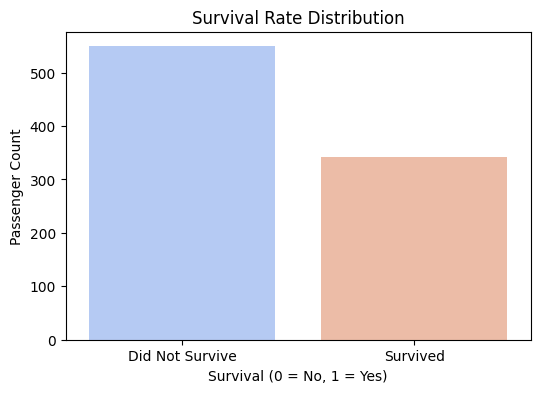

In [79]:
# survival distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", data=data, palette="coolwarm")

plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Passenger Count")
plt.title("Survival Rate Distribution")
plt.xticks([0, 1], ["Did Not Survive", "Survived"])
plt.show()

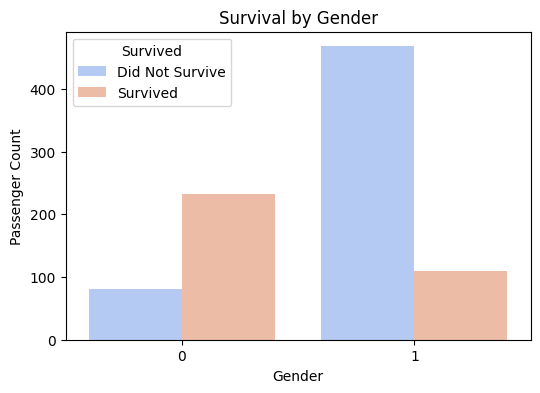

In [80]:
# Plot survival by gender
plt.figure(figsize=(6, 4))
sns.countplot(x="Sex", hue="Survived", data=data, palette="coolwarm")


plt.xlabel("Gender")
plt.ylabel("Passenger Count")
plt.title("Survival by Gender")
plt.legend(title="Survived", labels=["Did Not Survive", "Survived"])
plt.show()

In [81]:
data_class = data[["Pclass_1","Pclass_2","Pclass_3","Survived"]]

In [82]:
data_class['Pclass'] = data_class[['Pclass_1', 'Pclass_2', 'Pclass_3']].idxmax(axis=1)
data_class['Pclass'] = data_class['Pclass'].apply(lambda x: int(x.split('_')[1]))

<ipython-input-82-19e51508f01d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_class['Pclass'] = data_class[['Pclass_1', 'Pclass_2', 'Pclass_3']].idxmax(axis=1)
<ipython-input-82-19e51508f01d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_class['Pclass'] = data_class['Pclass'].apply(lambda x: int(x.split('_')[1]))


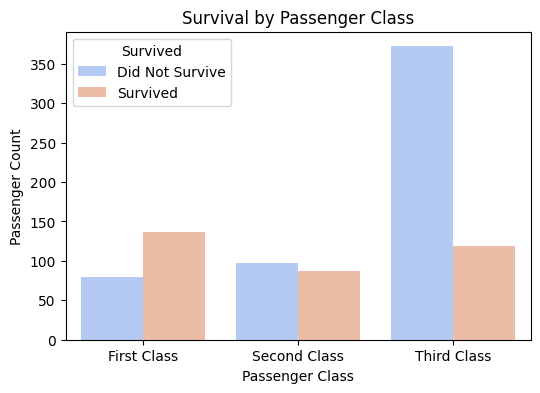

In [83]:
#survival by passenger class
plt.figure(figsize=(6, 4))
sns.countplot(x="Pclass", hue="Survived", data=data_class, palette="coolwarm")
plt.xlabel("Passenger Class")
plt.ylabel("Passenger Count")
plt.title("Survival by Passenger Class")
plt.xticks(ticks=[0, 1, 2], labels=["First Class", "Second Class", "Third Class"])
plt.legend(title="Survived", labels=["Did Not Survive", "Survived"])
plt.show()

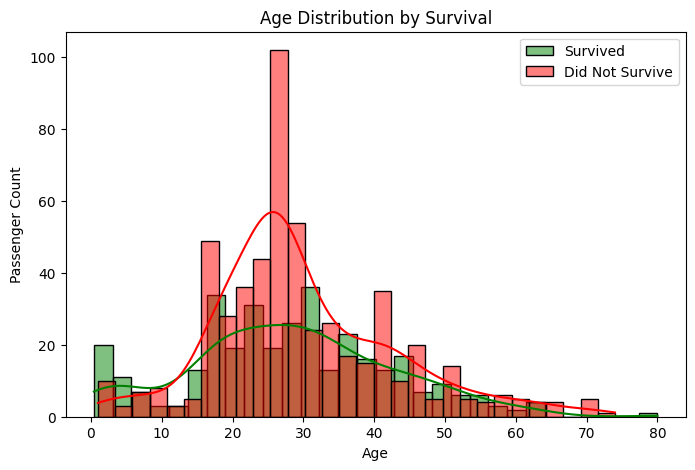

In [84]:
# Plot age distribution
plt.figure(figsize=(8, 5))
sns.histplot(data[data["Survived"] == 1]["Age"], bins=30, color="green", label="Survived", kde=True)
sns.histplot(data[data["Survived"] == 0]["Age"], bins=30, color="red", label="Did Not Survive", kde=True)
plt.xlabel("Age")
plt.ylabel("Passenger Count")
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()

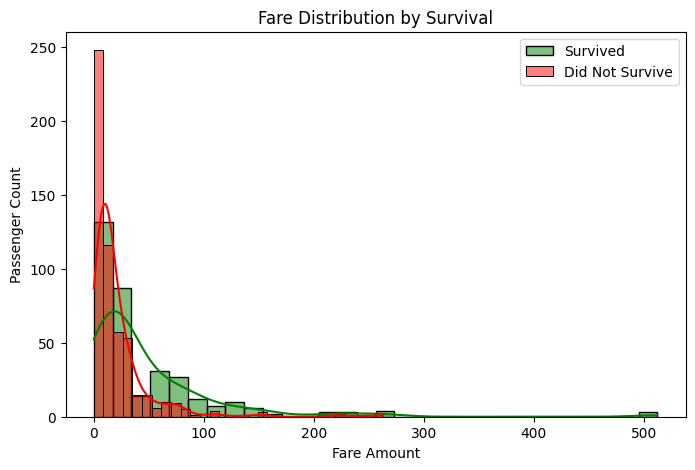

In [85]:
# Plot fare distribution
plt.figure(figsize=(8, 5))
sns.histplot(data[data["Survived"] == 1]["Fare"], bins=30, color="green", label="Survived", kde=True)
sns.histplot(data[data["Survived"] == 0]["Fare"], bins=30, color="red", label="Did Not Survive", kde=True)
plt.xlabel("Fare Amount")
plt.ylabel("Passenger Count")
plt.title("Fare Distribution by Survival")
plt.legend()
plt.show()

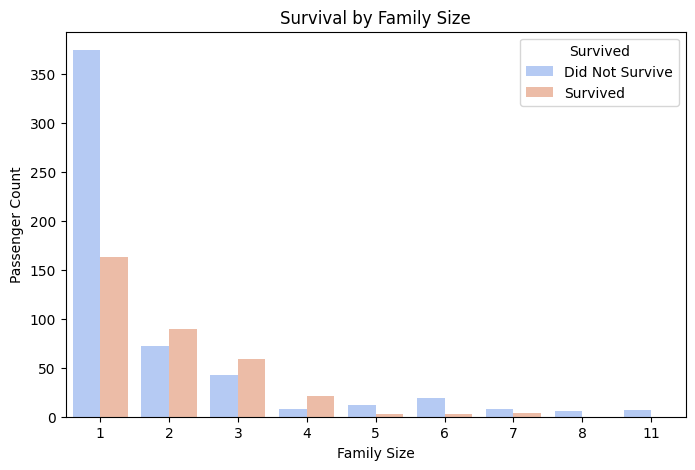

In [86]:
#FamilySize
data["FamilySize"] = data["SibSp"] + data["Parch"] + 1  # +1 to include the passenger

plt.figure(figsize=(8, 5))
sns.countplot(x="FamilySize", hue="Survived", data=data, palette="coolwarm")

plt.xlabel("Family Size")
plt.ylabel("Passenger Count")
plt.title("Survival by Family Size")
plt.legend(title="Survived", labels=["Did Not Survive", "Survived"])
plt.show()

#split the dataset into train and test

In [87]:
data1 = data[['Survived','Sex','Age','Fare','FamilySize','Pclass_1','Pclass_2','Pclass_3']]
# ,'Embarked_C','Embarked_Q','Embarked_S'

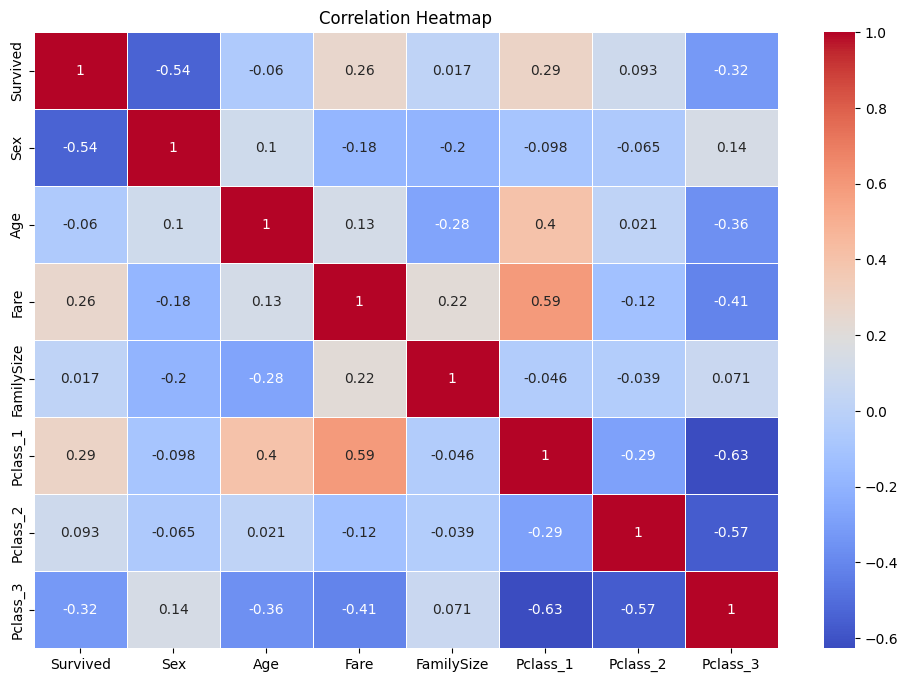

In [88]:
numerical_columns = data1.select_dtypes(include=['float64', 'int64','int32']).columns

correlation_matrix = data1[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [89]:
train_data = data1.sample(frac=0.8, random_state=22)
test_data = data1.drop(train_data.index)

In [90]:
train_data.columns

Index(['Survived', 'Sex', 'Age', 'Fare', 'FamilySize', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')

In [91]:
Xy_train = train_data.to_numpy()
Xy_test = test_data.to_numpy()

In [92]:
#train data into xtrain and ytrain
X_train1 = Xy_train[:,1:]
y_train = Xy_train[:,0]

In [93]:
X_train = (X_train1 - np.mean(X_train1, axis=0)) / np.std(X_train1, axis=0)

In [94]:
X_train.shape, y_train.shape

((713, 7), (713,))

In [95]:
#test data into xtest and y test
X_test1 = Xy_test[:,1:]
y_test = Xy_test[:,0]

In [96]:
X_test = (X_test1 - np.mean(X_test1, axis=0)) / np.std(X_test1, axis=0)

In [97]:
X_test.shape, y_test.shape

((178, 7), (178,))

#Logistic Regression

In [98]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
cmap_light = ListedColormap(['#FFBBBB', '#BBBBFF'])

In [99]:
def sigmoid(h):
  return 1/(1+np.exp(-h))

def cross_entropy(y, p_hat):
  return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))

def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [100]:
class LogisticRegression():
  def __init__(self, thresh=0.5):
    self.thresh=thresh
    self.W=None
    self.b=None

  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    N, D = X.shape


    #Initialize Weights and Biases
    self.W = np.random.randn(D)
    self.b = np.random.randn(1)

    J = np.zeros(epochs)

    #SGD
    for epoch in range(epochs):
      p_hat = self.__forward__(X)
      J[epoch] = cross_entropy(y, p_hat)

      #Weight Update Rules
      self.W -= eta*(1/N)*X.T@(p_hat-y)
      self.b -= eta*(1/N)*np.sum(p_hat-y)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def __forward__(self,X):
    return sigmoid(X@self.W+self.b)

  def predict(self, X):
    return (self.__forward__(X)>=self.thresh).astype(np.int32)







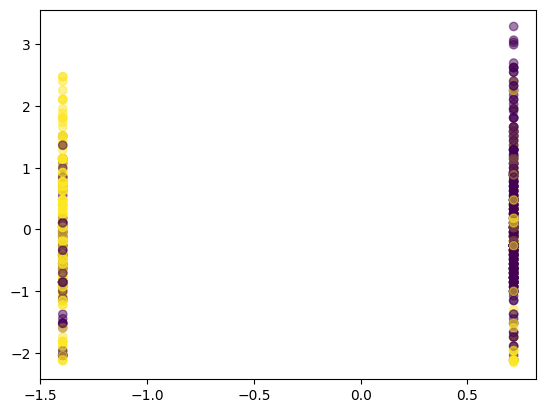

Training Accuracy:0.7966
[-1.1582751  -0.56287681  0.14176808 -0.39861146 -0.16567085 -0.56949366
 -1.30472579] [-0.71610286]


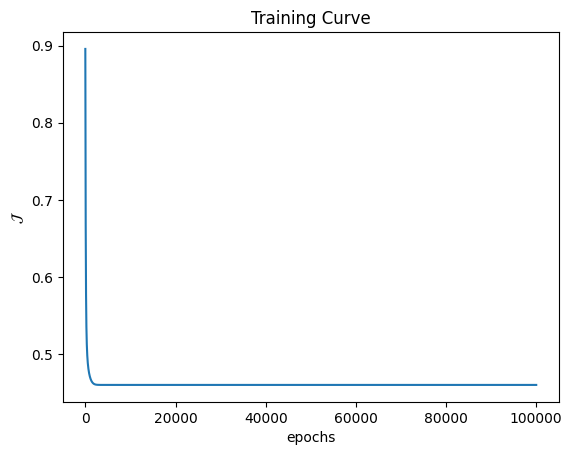

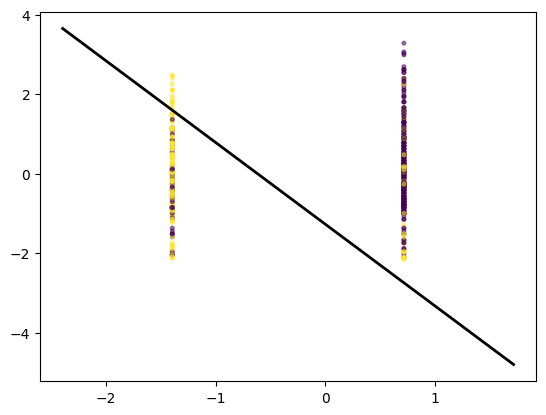

In [101]:
plt.figure()
plt.scatter(X_train[:,0], X_train[:,1], c = y_train, alpha = 0.5)
plt.show()


log_reg = LogisticRegression(thresh = 0.51)
log_reg.fit(X_train,y_train, epochs=1e5, eta=3e-2, show_curve=True)
y_hat = log_reg.predict(X_train)

print(f"Training Accuracy:{accuracy(y_train,y_hat):0.4f}")
print(log_reg.W, log_reg.b)

x1 = np.linspace(X_train[:,0].min()-1,X_train[:,0].max()+1, 1000)
y_line =-(log_reg.b/log_reg.W[1])-(log_reg.W[0]/log_reg.W[1])*x1

plt.figure()
plt.scatter(X_train[:,0],X_train[:,1], c=y_train, s=7, alpha=0.5)
plt.plot(x1,y_line,color="#000000", linewidth=2)
plt.show()

In [102]:
y_hat_test = log_reg.predict(X_test)

print(f"Testing Accuracy:{accuracy(y_test,y_hat_test):0.4f}")
print(log_reg.W, log_reg.b)

Testing Accuracy:0.8258
[-1.1582751  -0.56287681  0.14176808 -0.39861146 -0.16567085 -0.56949366
 -1.30472579] [-0.71610286]


#ANN

In [103]:
cmap_bold = ListedColormap(["#FF0000","#00FF00","#0000FF"])
cmap_light = ListedColormap(["#FFBBBB","#BBFFBB","#BBBBFF"])

In [104]:
# Activations

def linear(H):
  return H

def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1/(1+np.exp(-H))

def softmax(H):
  eH=np.exp(H)
  return eH/eH.sum(axis=1, keepdims=True)

#Loss Functions

def cross_entropy(Y, P_hat):
  return -(1/len(Y))*np.sum(Y*np.log(P_hat))

def OLS(Y, Y_hat):
  return (1/(2*len(Y)))*np.sum((Y-Y_hat)**2)

#Misc

def one_hot(y):
  N=len(y)
  K=len(set(y))
  Y = np.zeros((N,K))

  for i in range(N):
    Y[i,y[i]]=1

  return Y

def accuracy(y,y_hat):
  return np.mean(y==y_hat)

def R2(y,y_hat):
  return 1-np.sum((y-y_hat)**2)/np.sum((y - y.mean())**2)


In [105]:
def derivative(Z, a):
  if a == linear:
    return 1
  elif a == sigmoid:
    return Z*(1-Z)
  elif a==np.tanh:
    return 1-Z*Z
  elif a== ReLU:
    return (Z>0).astype(int)

  else:
    ValueError("unknown Activation")


In [106]:
class ANN():

  def __init__(self, architecture, activations=None, mode=0):
    self.mode=mode
    self.architecture = architecture
    self.activations = activations
    self.L = len(architecture)+1

  def fit (self, X, y, eta=1e-3, epochs=1e3,show_curve=False):
    epochs= int(epochs)
    if self.mode:
      Y=y
      K=1
    else:
      Y = one_hot(y)
      K = Y.shape[1]

    N,D = X.shape


    #Initialize Weights and Biases: Stochastic
    self.W = {l: np.random.randn(M[0],M[1]) for l, M in enumerate(zip(([D]+self.architecture), (self.architecture +[K])),1)}
    self.b = {l: np.random.randn(M) for l, M in enumerate(self.architecture+[K],1)}

    #Activations
    if self.activations is None:
      self.a = {l: ReLU for l in range(1,self.L)}
    else:
      self.a ={l: act for l , act in enumerate(self.activations,1)}

    #Output Activation Functions
    if self.mode:
      self.a[self.L]=linear
    else:
      self.a[self.L]=sigmoid

    J = np.zeros(epochs)

    #Grad Descent/ Back prop

    for epoch in range(epochs):
      self.__forward__(X)
      if self.mode:
        J[epoch]= OLS(Y, self.Z[self.L])
      else:
        J[epoch]=cross_entropy(Y, self.Z[self.L])

      dH = (1/N)*(self.Z[self.L]-Y)

      for l in sorted (self.W.keys(), reverse=True):

        dW = self.Z[l-1].T@dH
        db = dH.sum(axis=0)

        self.W[l] -= eta*dW
        self.b[l] -= eta*db

        if l>1:
          dZ =dH@self.W[l].T
          dH =dZ*derivative(self.Z[l-1], self.a[l-1])

    if show_curve:
        plt.figure()
        plt.plot(J)
        plt.xlabel("epochs")
        plt.ylabel("$\mathcal{J}$")
        plt.show()

  def __forward__(self, X):
    self.Z ={0:X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.b[l])

  def predict(self, X):
    self.__forward__(X)
    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis=1)

In [107]:
class ANN():

  def __init__(self, architecture, activations=None, mode=0):
    self.mode=mode
    self.architecture = architecture
    self.activations = activations
    self.L = len(architecture)+1

  def fit (self, X, y, eta=1e-3, epochs=1e3,show_curve=False):
    epochs= int(epochs)
    if self.mode:
      Y=y
      K=1
    else:
      Y = one_hot(y)
      K = Y.shape[1]

    N,D = X.shape


    #Initialize Weights and Biases: Stochastic
    self.W = {l: np.random.randn(M[0],M[1]) for l, M in enumerate(zip(([D]+self.architecture), (self.architecture +[K])),1)}
    self.b = {l: np.random.randn(M) for l, M in enumerate(self.architecture+[K],1)}

    #Activations
    if self.activations is None:
      self.a = {l: ReLU for l in range(1,self.L)}
    else:
      self.a ={l: act for l , act in enumerate(self.activations,1)}

    #Output Activation Functions
    if self.mode:
      self.a[self.L]=linear
    else:
      self.a[self.L]=sigmoid

    J = np.zeros(epochs)

    #Grad Descent/ Back prop

    for epoch in range(epochs):
      self.__forward__(X)
      if self.mode:
        J[epoch]= OLS(Y, self.Z[self.L])
      else:
        J[epoch]=cross_entropy(Y, self.Z[self.L])

      dH = (1/N)*(self.Z[self.L]-Y)

      for l in sorted (self.W.keys(), reverse=True):

        dW = self.Z[l-1].T@dH
        db = dH.sum(axis=0)

        self.W[l] -= eta*dW
        self.b[l] -= eta*db

        if l>1:
          dZ =dH@self.W[l].T
          dH =dZ*derivative(self.Z[l-1], self.a[l-1])

    if show_curve:
        plt.figure()
        plt.plot(J)
        plt.xlabel("epochs")
        plt.ylabel("$\mathcal{J}$")
        plt.show()

  def __forward__(self, X):
    self.Z ={0:X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.b[l])

  def predict(self, X):
    self.__forward__(X)
    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis=1)

In [108]:
X_train

array([[-1.39509175, -0.48405322, -0.48244999, ..., -0.56601269,
        -0.50525408,  0.89725319],
       [ 0.71679873,  1.21648765,  0.87553076, ...,  1.76674483,
        -0.50525408, -1.11451261],
       [ 0.71679873, -1.88884785, -0.42132324, ..., -0.56601269,
        -0.50525408,  0.89725319],
       ...,
       [ 0.71679873, -0.66889462, -0.49531056, ..., -0.56601269,
        -0.50525408,  0.89725319],
       [ 0.71679873, -1.51916505, -0.24238605, ..., -0.56601269,
        -0.50525408,  0.89725319],
       [ 0.71679873,  0.69893173, -0.38575757, ..., -0.56601269,
         1.97920221, -1.11451261]])

In [109]:
type(y_train), set(y_train),

(numpy.ndarray, {0.0, 1.0})

In [110]:
y_train = y_train.astype(int)

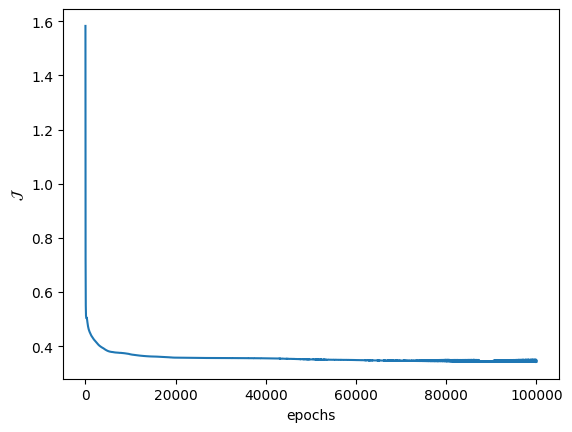

Accuracy:  0.8471


In [111]:
my_ann_classifier = ANN(architecture=[6,4], activations=[np.tanh,ReLU])
my_ann_classifier.fit(X_train,y_train, eta=3e-2, epochs=1e5, show_curve=True)
y_hat=my_ann_classifier.predict(X_train)
print(f"Accuracy:  {accuracy(y_train,y_hat):0.4f}")

In [112]:
y_hat_test=my_ann_classifier.predict(X_test)
print(f"Testing Accuracy:  {accuracy(y_test,y_hat_test):0.4f}")

Testing Accuracy:  0.8427
